# Digital Image


In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import requests

In [1]:
# rgb to binary
# rgb hist
# equalization
# Noise reduction
    # guassian noise
    # median blur
    # bilateral filter
    # guassian blur
# edge processing
    # sobel filter
    # canny
# morph
    # erosion
    # dilation  
    # open
    # close

(512, 512, 3)


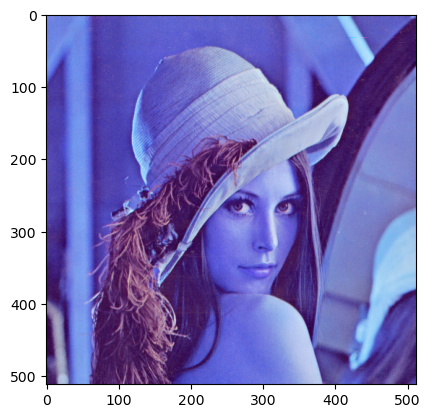

In [17]:

my_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
req = urllib.request.urlopen(my_url)
arr = np.asarray(bytearray(req.read()), dtype='uint8')
img = cv.imdecode(arr, cv.IMREAD_COLOR) 
print(img.shape)
plt.imshow(img)

(512, 512)


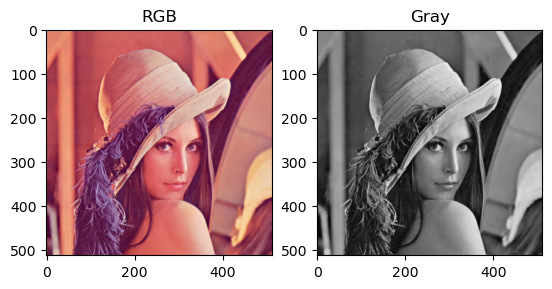

In [15]:
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.subplot(1,2,1)
plt.title('RGB')
plt.imshow(image_rgb)

print(image_gray.shape)
plt.subplot(1,2,2)
plt.title('Gray')
plt.imshow(image_gray, cmap='gray')


[[255 255 255 ... 255   0   0]
 [255 255 255 ... 255   0   0]
 [255 255 255 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


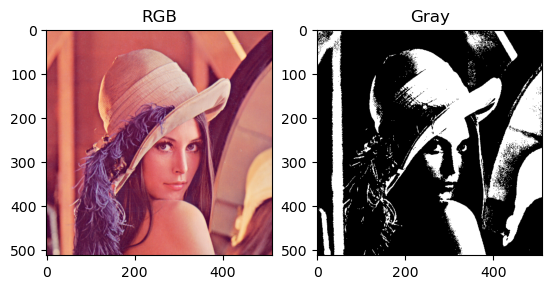

In [20]:
ret, image_binary = cv.threshold(image_gray, 135, 255, cv.THRESH_BINARY)

plt.subplot(1,2,1)
plt.title('RGB')
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title('Gray')
plt.imshow(image_binary, cmap='gray')
# print(image_binary)

### RGB to binary

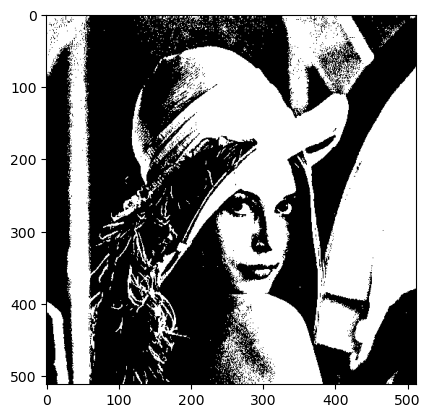

In [27]:
def merge(R, G, B):    
    rows, cols = R.shape
    r = np.zeros((rows,cols), np.uint8)    
    for i in range(rows):
        for j in range(cols):
            if R[i,j] == G[i,j] == B[i,j] and (R[i,j] == 255 or G[i,j] == 255 or B[i,j] == 255):
                r[i, j] = 1
    return r


# split
def rbg2binary(image_rgb, threashold: list):
    R, G, B = cv.split(image_rgb)
    _, R = cv.threshold(R, threashold[0],255, cv.THRESH_BINARY)
    _, G = cv.threshold(G, threashold[1],255, cv.THRESH_BINARY)
    _, B = cv.threshold(B, threashold[2],255, cv.THRESH_BINARY)    
    return merge(R, G, B)
out_img = rbg2binary(image_rgb, [100, 100, 100])
plt.imshow(out_img, cmap='gray')


# threashold on each image on 1 channel
# merge


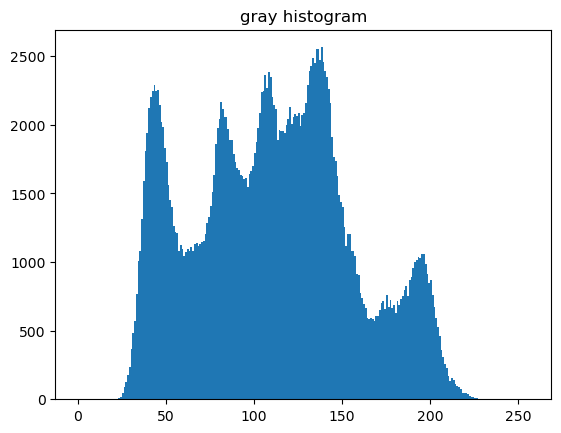

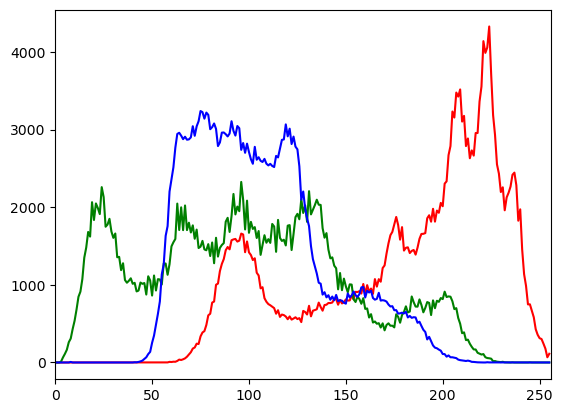

In [48]:
def gray_hist(image):
    plt.hist(image.ravel(),256, [0,256])
    plt.title("gray histogram")
    plt.show()

def rgb_hist(image):
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        hist = cv.calcHist([image], [i], None, [256],[0,256])
        plt.plot(hist, color=color)
        plt.xlim([0,256])
    plt.show()

gray_hist(image_gray)
rgb_hist(image_rgb)

### Histogram equalization

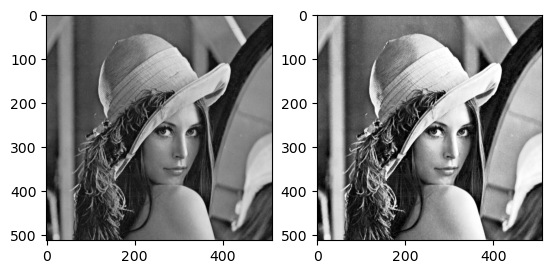

In [50]:
img_equalized = cv.equalizeHist(image_gray)
plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_equalized, cmap='gray')



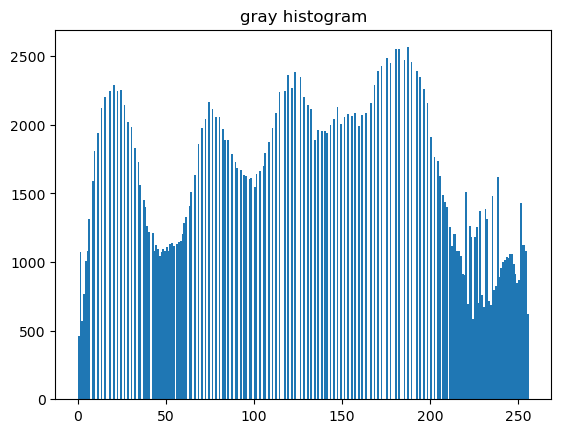

In [51]:
gray_hist(img_equalized)


### Gamma correction

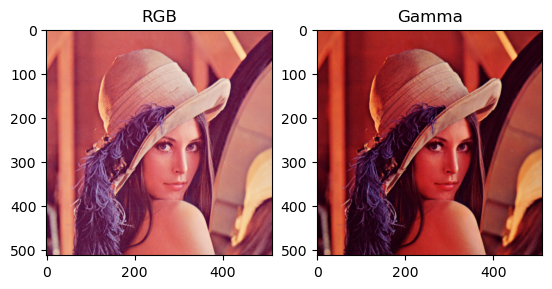

In [58]:
def gamm_correction(imag):
    gm = np.power(imag/255.0, 2) * 255.0
    gm = gm.astype(np.uint8)
    return gm

gamma_img = gamm_correction(image_rgb)

plt.subplot(1,2,1)
plt.title('RGB')
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title('Gamma')
plt.imshow(gamma_img)

### Guassian Noise

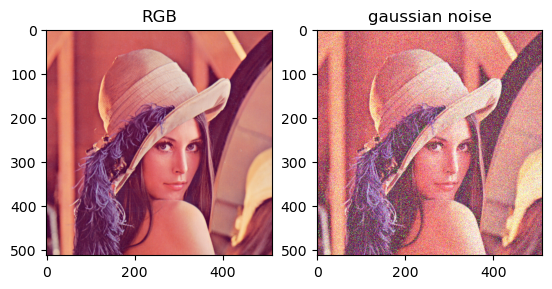

In [88]:
def gaussian_noise(imag, mean = 0, var = 0.001):
    imag_std = imag/255.0
    noise = np.random.normal(mean, var ** 0.5, imag.shape)
    out = imag_std + noise
    low_clip = -1 if out.min() < 0 else 0
    out = np.clip(out, low_clip, 1.0)
    return (out*255.0 ).astype(np.uint8)

gaussian_image = gaussian_noise(image_rgb, 0.1, 0.02)

plt.subplot(1,2,1)
plt.title('RGB')
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title('gaussian noise')
plt.imshow(gaussian_image)



### Gaussian filter

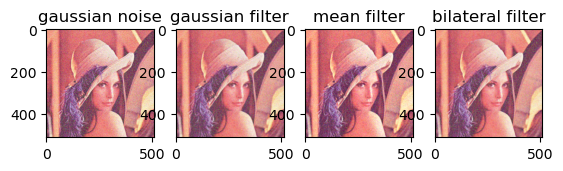

In [89]:
gaussian_filtered = cv.GaussianBlur(gaussian_image, (5,5), 0)
mean_filtered = cv.medianBlur(gaussian_image, 3 )
bi_filtered = cv.bilateralFilter(gaussian_image, 7, 75, 75)

plt.subplot(1,4,1)
plt.title('gaussian noise')
plt.imshow(gaussian_image)

plt.subplot(1,4,2)
plt.title('gaussian filter')
plt.imshow(gaussian_filtered)

plt.subplot(1,4,3)
plt.title('mean filter')
plt.imshow(mean_filtered)

plt.subplot(1,4,4)
plt.title('bilateral filter')
plt.imshow(bi_filtered)

### Sobel

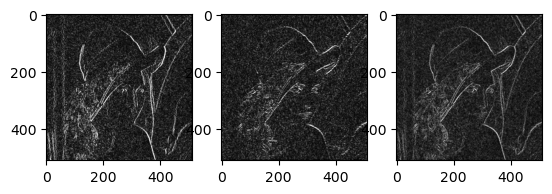

In [92]:
gaussian_image = gaussian_noise(image_gray, 0.1, 0.02)
gaussian_filtered = cv.GaussianBlur(gaussian_image, (5,5), 0)
sobel_x = cv.Sobel(gaussian_filtered, cv.CV_16S, 1, 0)
sobel_y = cv.Sobel(gaussian_filtered, cv.CV_16S, 0, 1)

absX = cv.convertScaleAbs(sobel_x)
absY = cv.convertScaleAbs(sobel_y)
dis = cv.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.subplot(1,3,1)
plt.imshow(absX, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(absY, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(dis, cmap='gray')

### Canny

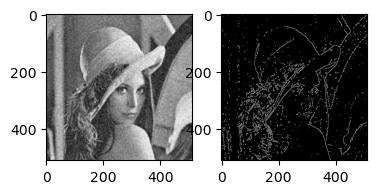

In [100]:
gaussian_image = gaussian_noise(image_gray, 0.1, 0.02)
gaussian_filtered = cv.GaussianBlur(gaussian_image, (5,5), 0)
canny = cv.Canny(gaussian_filtered, 150, 190)

plt.subplot(1,3,1)
plt.imshow(gaussian_filtered, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(canny, cmap='gray')


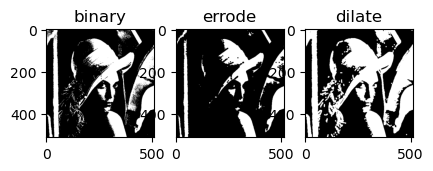

In [103]:
kernel = np.ones((5,5), np.uint8)

errod_img = cv.erode(image_binary, kernel)
dilat_img = cv.dilate(image_binary, kernel)

open_img = cv.morphologyEx(image_binary,cv.MORPH_OPEN ,kernel)
close_img = cv.morphologyEx(image_binary,cv.MORPH_CLOSE ,kernel)

plt.subplot(1,5,1)
plt.title('binary')
plt.imshow(image_binary, cmap='gray')

plt.subplot(1,5,2)
plt.title('errode')
plt.imshow(errod_img, cmap='gray')

plt.subplot(1,5,3)
plt.title('dilate')
plt.imshow(dilat_img, cmap='gray')

plt.subplot(1,5,4)
plt.title('open')
plt.imshow(open_img, cmap='gray')

plt.subplot(1,5,5)
plt.title('close')
plt.imshow(close_img, cmap='gray')
